# Basics of Scikit-learn for Machine Learning - Part 1

## Content:  Algorithms  
1. K Neighbors Classifier.
2. K Neighbors Regression.
3. Linear Regression.
4. Ridge Regression.
5. Lasso Regression.
6. Polynomial Regression.
7. Logistic Regression.
8. Support Vector Machine (SVM) .
9. Kernelized Support Vector Machine (K-SVM).
10. Decision Trees.
11. Naive-Bayes Classifier(Gaussian)
12. Random Forest .
13. Gradient-boosted decision trees.
14. Neural Network.

In [1]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
%matplotlib notebook

### Importing Datasets for Different problems Problem

1. **Make_regression Synthetic Dataset.** *(Returns Xr, yr)*
2. **Make Friedman1 Synthetic Dataset.** *(Returns Xf, yf)*
3. **Make Classification Synthetic Dataset.** *(Returns Xc, yc)*
4. **Crime Dataset.** *(Return X_crime, y_crime)*
5. **Cancer Dataset.** *(Returns X_cancer, y_cancer)*
6. **Make blobs Synthetics Dataset.** *(Returns Xb, yb)*

<IPython.core.display.Javascript object>


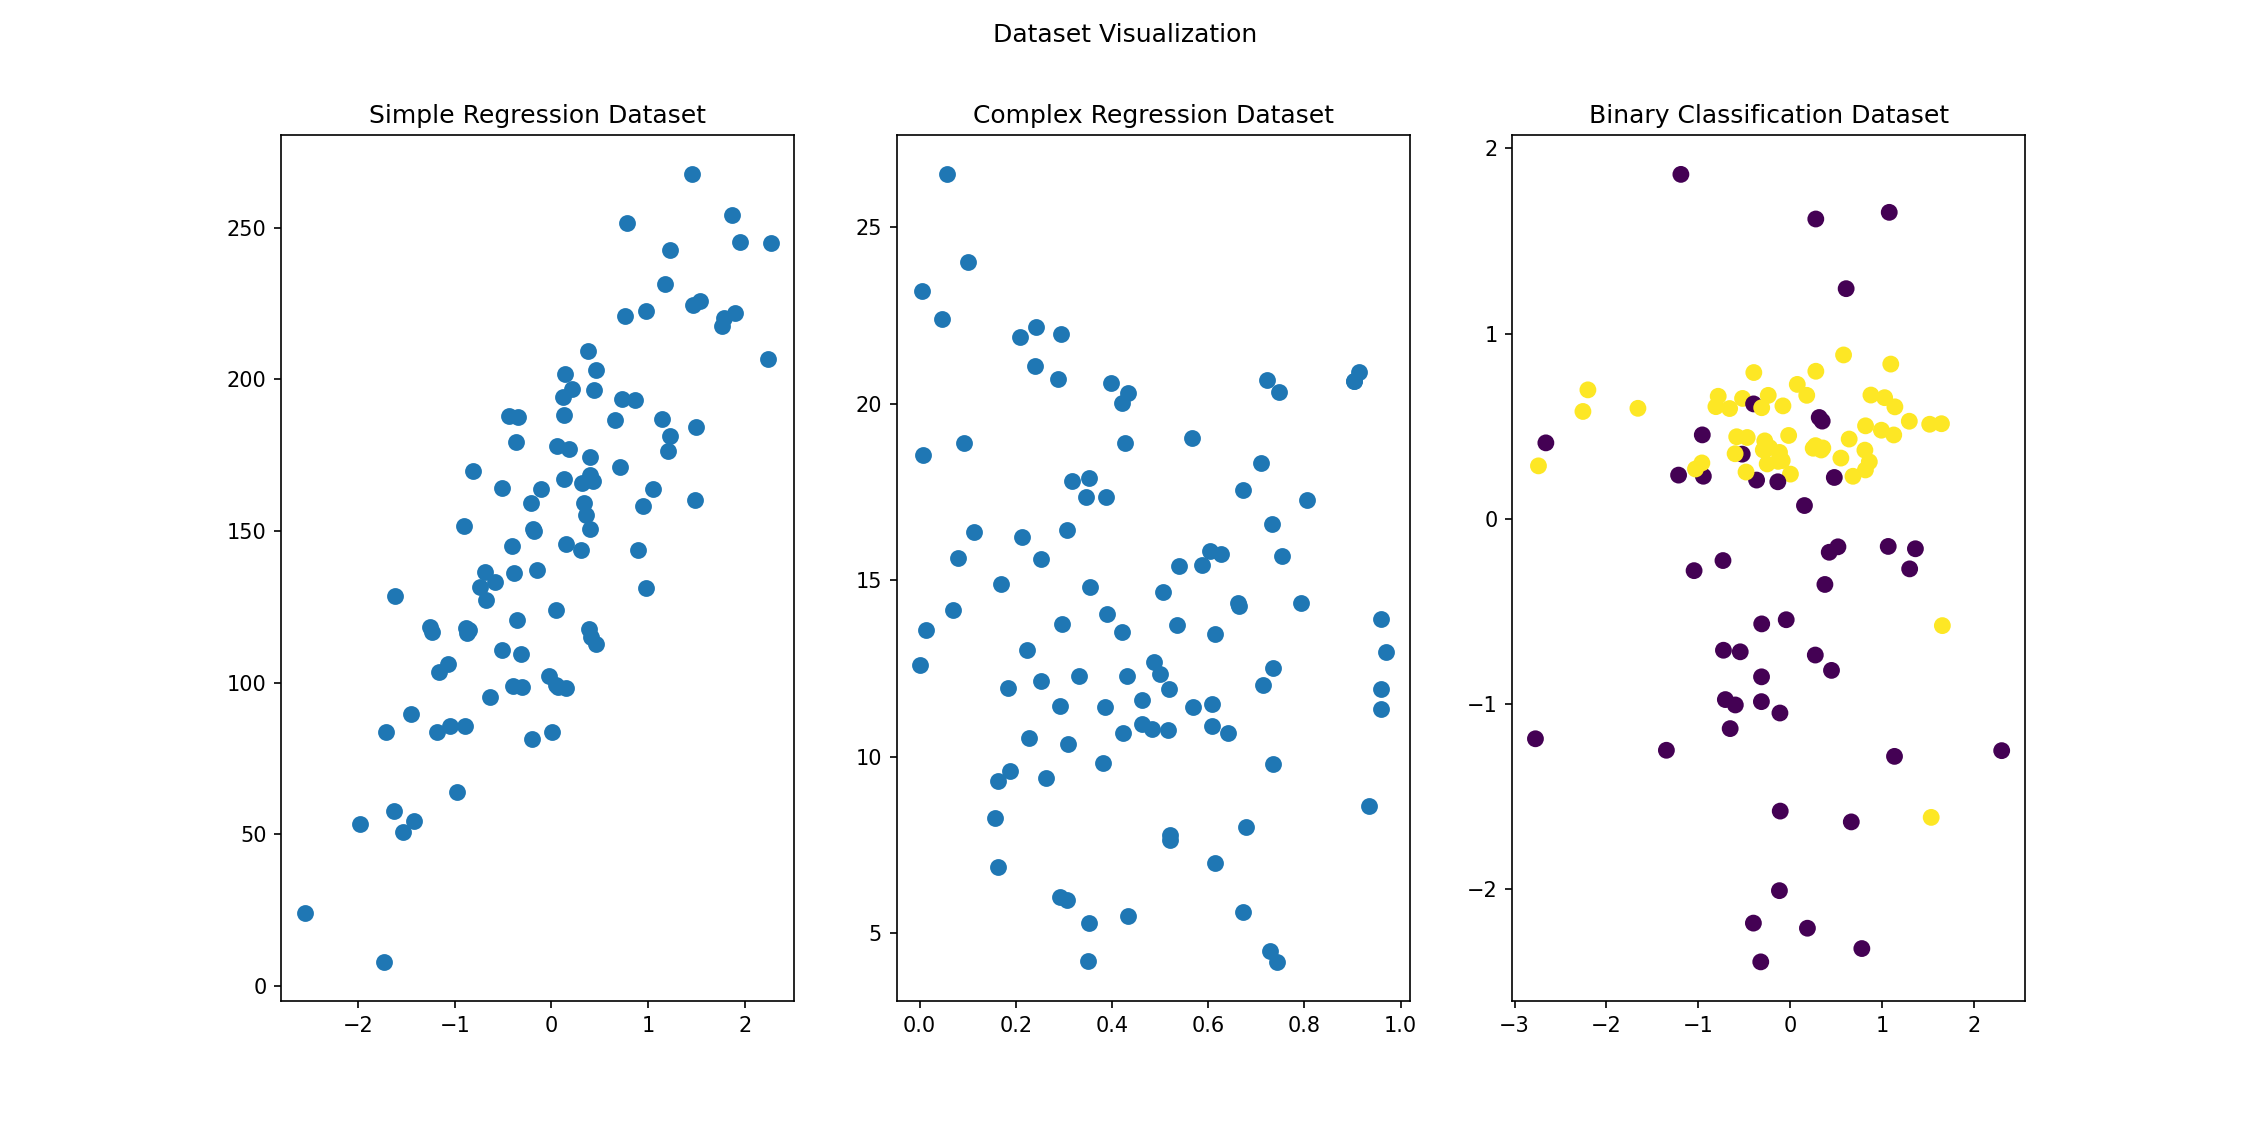

In [2]:
fig, subaxes = plt.subplots(1,3, figsize = (10,5))

# 1. synthetic dataset for simple regression
from sklearn.datasets import make_regression
Xr, yr = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
subaxes[0].scatter(Xr, yr,marker= 'o', s=50)

# 2. synthetic dataset for complex regression
from sklearn.datasets import make_friedman1
Xf, yf = make_friedman1(n_samples=100, n_features=5, noise=0.0, random_state=None)
subaxes[1].scatter(Xf[:,2], yf,marker= 'o', s=50)

# 3. synthetic dataset for classification (binary) 
from sklearn.datasets import make_classification
Xc, yc = make_classification(n_samples = 100, n_features=5,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

# 4. reading crime dataset
def load_crime_dataset():
    # Communities and Crime dataset for regression
    # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized

    crime = pd.read_table('CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
    # remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
    columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
    crime = crime.iloc[:,columns_to_keep].dropna()

    X_crime = crime.iloc[:,range(0,88)]
    y_crime = crime['ViolentCrimesPerPop']

    return (X_crime, y_crime)

# 5. Cancer Dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer,y_cancer = cancer['data'],cancer['target']


# 6. Make Blobs synthetic Data
from sklearn.datasets import make_blobs
Xb, yb = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

# 7.Fruit dataset.
def load_fruit_data():
    fruits = pd.read_csv(r'C:\Users\dewan\Desktop\Nerd Stuff\DS\4.Applied DS\C3\Data\fruit_data_with_colors.txt', sep = '\t')
    fruit_types = list(fruits['fruit_name'].unique())
    target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

    # Set X and Y value accordingly.
    X_fruit = fruits[['mass', 'width', 'height', 'color_score']]
    y_fruit = fruits['fruit_label']
    
    return X_fruit, y_fruit, fruit_types

subaxes[2].scatter(Xc[:,0], Xc[:,1], c = yc, marker= 'o', s=50)
plt.suptitle('Dataset Visualization')
subaxes[0].set_title('Simple Regression Dataset')
subaxes[1].set_title('Complex Regression Dataset')
subaxes[2].set_title('Binary Classification Dataset')
plt.show()

## Algorithm 1 : K-Neighbors Classifier.

In [3]:
X_fruit, y_fruit, fruit_types = load_fruit_data()
# split the Train and Test Data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_fruit, y_fruit, random_state = 0)

# Scaling the inputs.
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Build the Classifier.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Train the data.
knn.fit(X_train_scaled, y_train)
# Accuracy .
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)


print('Train Accuracy :\t',train_accuracy,'\nTest Accuracy  :\t',test_accuracy)
# Testing against a custom data , ['mass', 'width', 'height', 'color_score']
example_fruit = [[10, 2.2, 5.5, 0.70]]
example_fruit_scaled = scale.transform(example_fruit)
prediction = knn.predict(example_fruit_scaled)
print("Testing against Custom fruit(",example_fruit,")\nPredicted type is :\t", fruit_types[prediction[0]-1])

Train Accuracy :	 0.9545454545454546 
Test Accuracy  :	 1.0
Testing against Custom fruit( [[10, 2.2, 5.5, 0.7]] )
Predicted type is :	 mandarin


## Algorithm  2 : KNN-Regressor.

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(Xr, yr, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 5)
knnreg.fit(X_train, y_train)
print('Accuracy of this model is : {:.3f}'.format(knnreg.score(X_test, y_test)))

Accuracy of this model is : 0.425


<IPython.core.display.Javascript object>


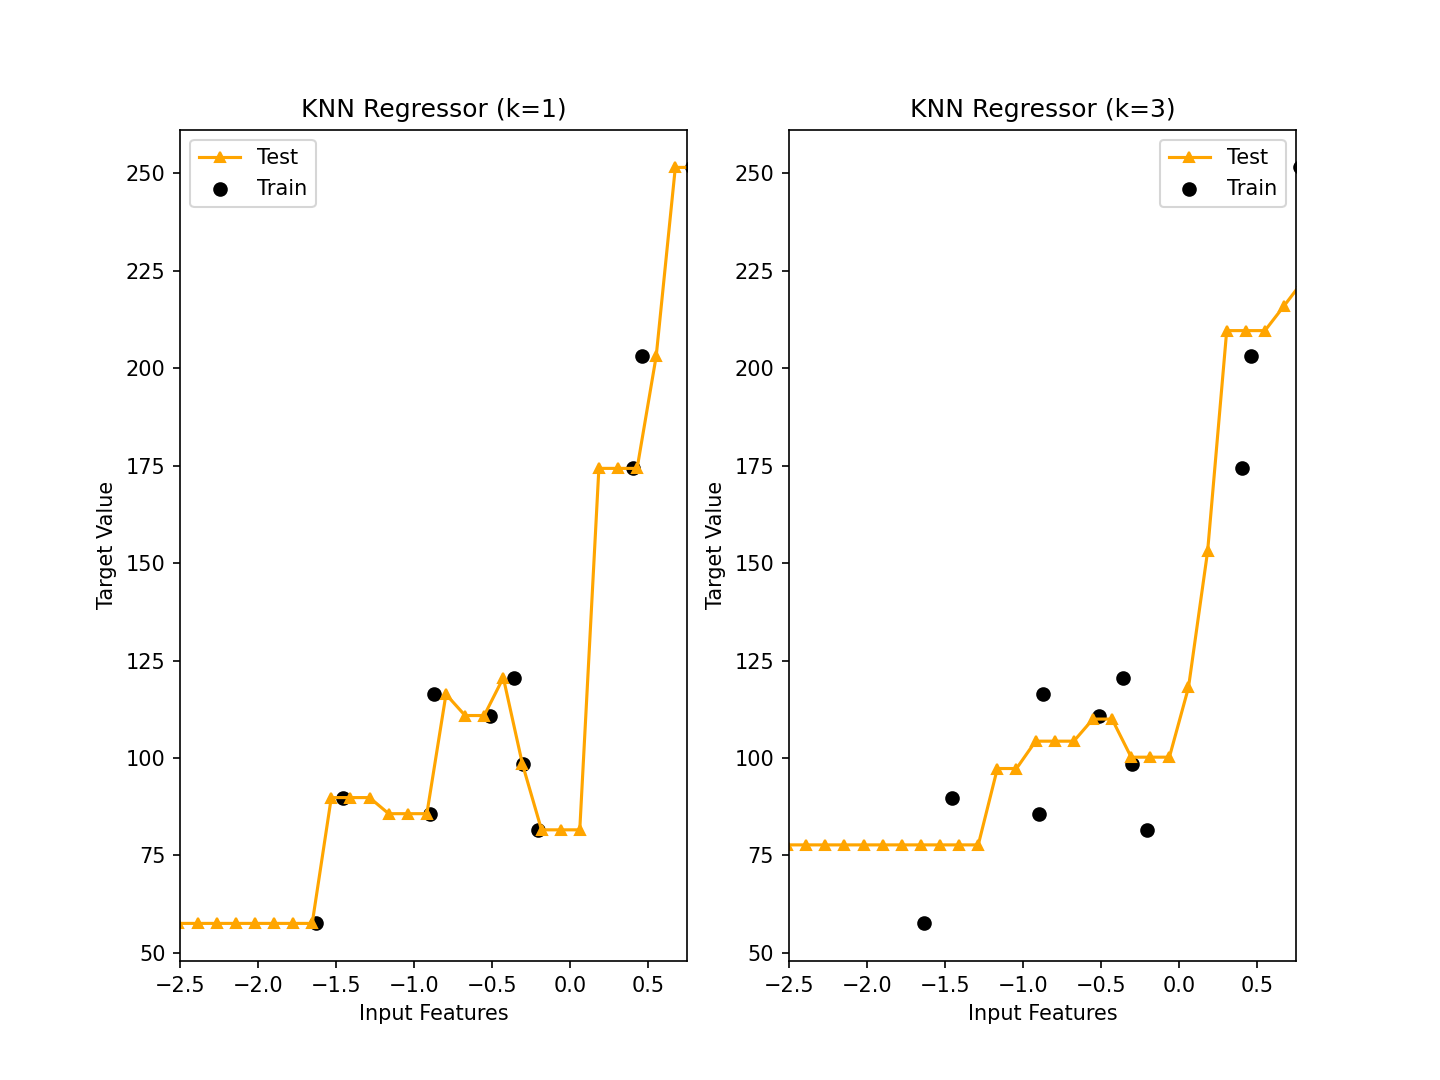

In [5]:
# Testing against custom data
fig, ax = plt.subplots(1,2)
X_pred = np.linspace(-3,3,50).reshape(-1, 1)
X_train,X_test, y_train, y_test = train_test_split(Xr[0::5], yr[0::5], random_state = 0)
for axis,k in zip(ax, [1,3]):
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    y_pred = knnreg.predict(X_pred)
    
    axis.set_xlim([-2.5, .75])
    axis.scatter(X_train, y_train, marker = 'o', label = 'Train', color = 'black')
    axis.plot(X_pred, y_pred, marker = '^', label = 'Test', color = 'orange', markersize = 5)
    axis.set_title('KNN Regressor (k={})'.format(k))
    axis.set_xlabel('Input Features')
    axis.set_ylabel('Target Value')
    axis.legend()

**Regression model complexity as a function of K.**

<IPython.core.display.Javascript object>


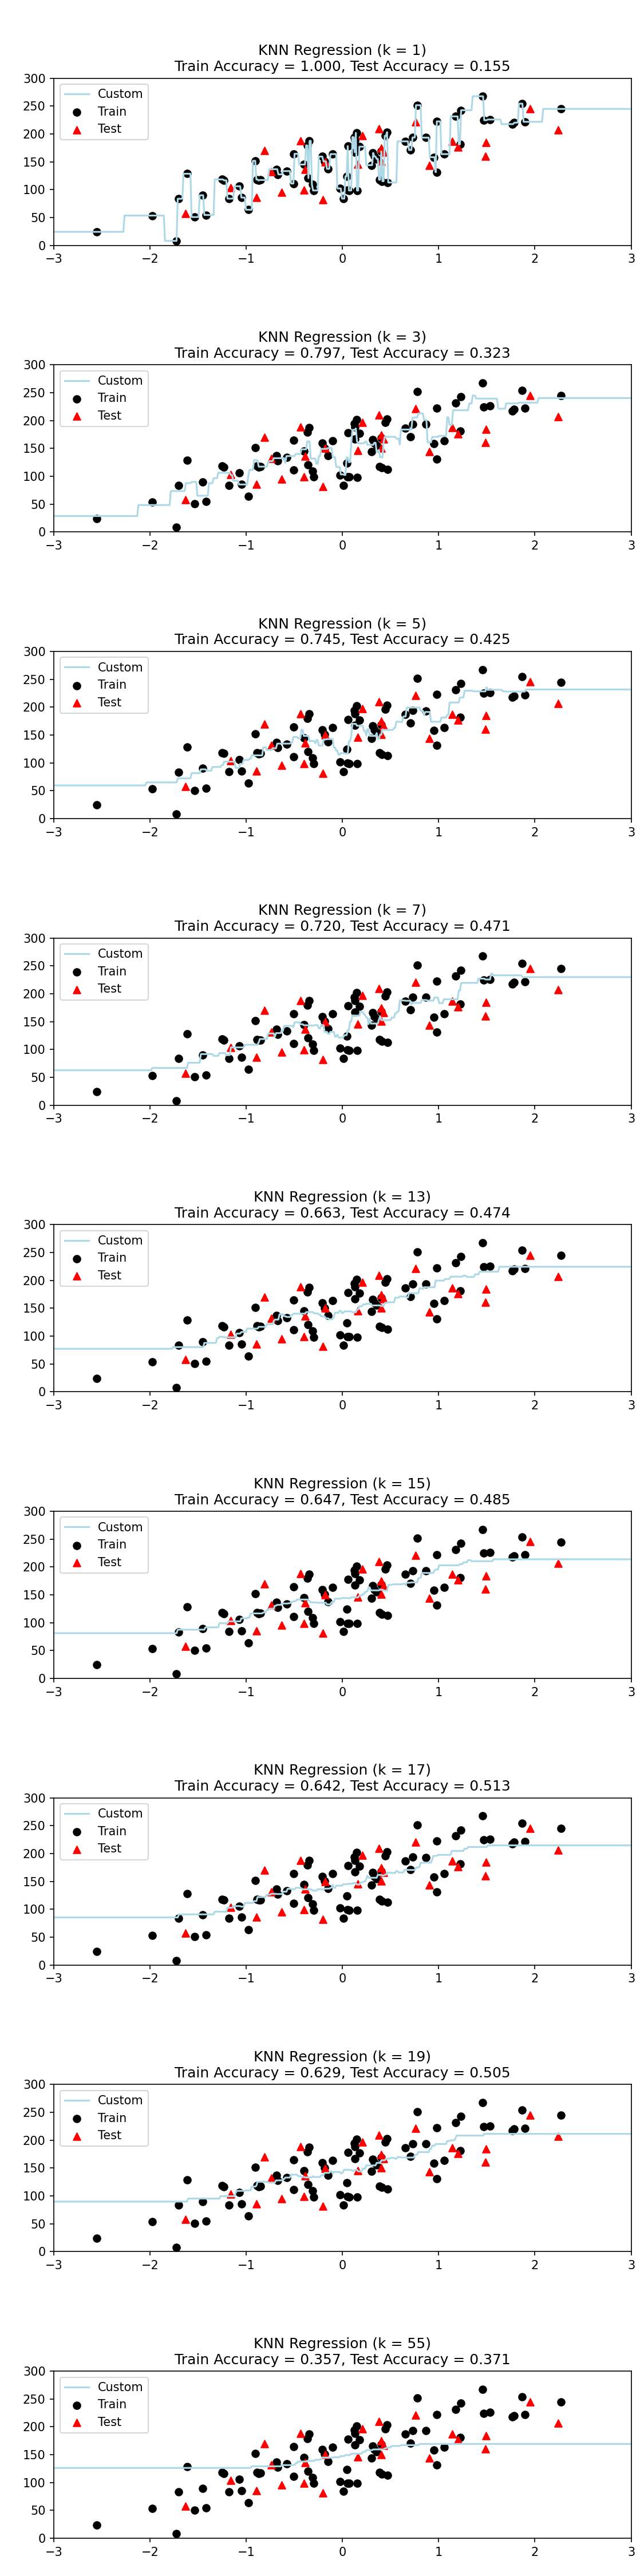

In [6]:
# plot k-NN regression on sample dataset for different values of K
fig, ax = plt.subplots(9, 1, figsize = (5, 20))
X_pred = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, random_state = 0)
for axis,k in zip(ax, [1,3,5,7,13,15,17,19,55]):
    knnreg = KNeighborsRegressor(n_neighbors = k)
    knnreg.fit(X_train, y_train)
    y_pred = knnreg.predict(X_pred)
    train_score = knnreg.score(X_train,y_train)
    test_score = knnreg.score(X_test, y_test)
    
    axis.set_xlim([-3, 3])
    axis.set_ylim([0,300])
    axis.scatter(X_train, y_train, marker = 'o', label = 'Train', alpha = 1, color = 'black')
    axis.scatter(X_test, y_test, marker = '^', label = 'Test', alpha = 1, color = 'red')
    
    axis.plot(X_pred, y_pred, label = 'Custom', color = 'lightblue')
    
    axis.set_title('\nKNN Regression (k = {})\nTrain Accuracy = {:.3f}, Test Accuracy = {:.3f}'
                  .format(k, train_score, test_score))
    axis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Algorithm 3 : Linear Regression

Train Accuracy : 0.679
Test Accuracy : 0.492
Linear model coefficient(w) : [45.70870465]
Linear model intercept(b) : 148.446


<IPython.core.display.Javascript object>


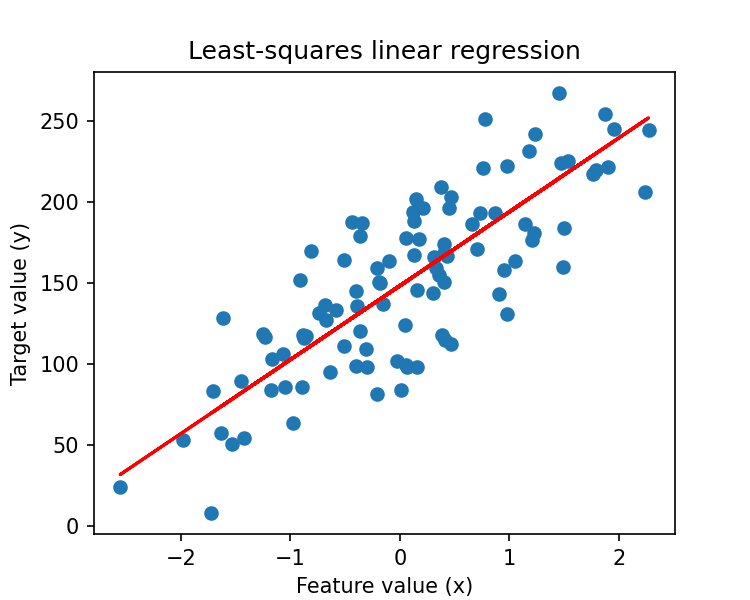

In [7]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(Xr, yr, random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
train_acc = linreg.score(X_train, y_train)
test_acc = linreg.score(X_test, y_test)
Linear_model_coefficient = linreg.coef_
Linear_model_intercept = linreg.intercept_

print('Train Accuracy : {:.3f}\nTest Accuracy : {:.3f}'.format(train_acc, test_acc))
print('Linear model coefficient(w) : {}\nLinear model intercept(b) : {:.3f}'
      .format(Linear_model_coefficient, Linear_model_intercept))

plt.figure(figsize = (5,4))
plt.scatter(Xr, yr, label = 'train data')
line = Linear_model_coefficient*Xr + Linear_model_intercept
plt.plot(Xr, line, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

In [8]:
(X_crime, y_crime) = load_crime_dataset()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.fit(X_train, y_train)
train_acc_lin = linreg.score(X_train, y_train)
test_acc_lin = linreg.score(X_test, y_test)
w_lin = linreg.coef_
b_lin = linreg.intercept_

print('Train Accuracy : {:.3f}\nTest Accuracy : {:.3f}'.format(train_acc_lin, test_acc_lin))
#print('Linear model coefficient(w) : {}\nLinear model intercept(b) : {:.3f}'
      #.format(w_lin, b_lin))


Train Accuracy : 0.641
Test Accuracy : 0.530


## Algorithm 4 : Ridge Regression

In [9]:
(X_crime, y_crime) = load_crime_dataset()
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
linridge = Ridge(alpha = 20)
linridge.fit(X_train, y_train)
train_acc_ridge = linridge.score(X_train, y_train)
test_acc_ridge = linridge.score(X_test, y_test)
w_ridge = linridge.coef_
b_ridge = linridge.intercept_

print('Train Accuracy : {:.3f}\nTest Accuracy : {:.3f}'.format(train_acc_ridge, test_acc_ridge))
#print('Linear model coefficient(w) : {}\nLinear model intercept(b) : {:.3f}'
      #.format(w_ridge, b_ridge))

Train Accuracy : 0.671
Test Accuracy : 0.494


**Ridge Regression with Feature Normalization.**

In [10]:
(X_crime, y_crime) = load_crime_dataset()
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
linridge = Ridge(alpha = 20)
linridge.fit(X_train_scaled, y_train)
train_acc_rf = linridge.score(X_train_scaled, y_train)
test_acc_rf = linridge.score(X_test_scaled, y_test)
w_rf = linridge.coef_
b_rf = linridge.intercept_

print('Train Accuracy : {:.3f}\nTest Accuracy : {:.3f}'.format(train_acc_rf, test_acc_rf))
#print('Linear model coefficient(w) : {}\nLinear model intercept(b) : {:.3f}'
      #.format(w_rf, b_rf))

Train Accuracy : 0.615
Test Accuracy : 0.599


**Ridge regression with regularization parameter: alpha**

Effect of alpha in Train and Test Accuracy.

For Alpha = 0.100:
Train Accuracy : 0.670, Test Accuracy : 0.529
For Alpha = 0.115:
Train Accuracy : 0.670, Test Accuracy : 0.531
For Alpha = 0.133:
Train Accuracy : 0.670, Test Accuracy : 0.533
For Alpha = 0.153:
Train Accuracy : 0.669, Test Accuracy : 0.535
For Alpha = 0.176:
Train Accuracy : 0.669, Test Accuracy : 0.538
For Alpha = 0.202:
Train Accuracy : 0.669, Test Accuracy : 0.540
For Alpha = 0.233:
Train Accuracy : 0.668, Test Accuracy : 0.542
For Alpha = 0.268:
Train Accuracy : 0.668, Test Accuracy : 0.544
For Alpha = 0.309:
Train Accuracy : 0.667, Test Accuracy : 0.546
For Alpha = 0.356:
Train Accuracy : 0.667, Test Accuracy : 0.548
For Alpha = 0.409:
Train Accuracy : 0.666, Test Accuracy : 0.549
For Alpha = 0.471:
Train Accuracy : 0.665, Test Accuracy : 0.551
For Alpha = 0.543:
Train Accuracy : 0.664, Test Accuracy : 0.553
For Alpha = 0.625:
Train Accuracy : 0.663, Test Accuracy : 0.555
For Alpha = 0.720:
Train Accuracy : 0.663, Te

<IPython.core.display.Javascript object>


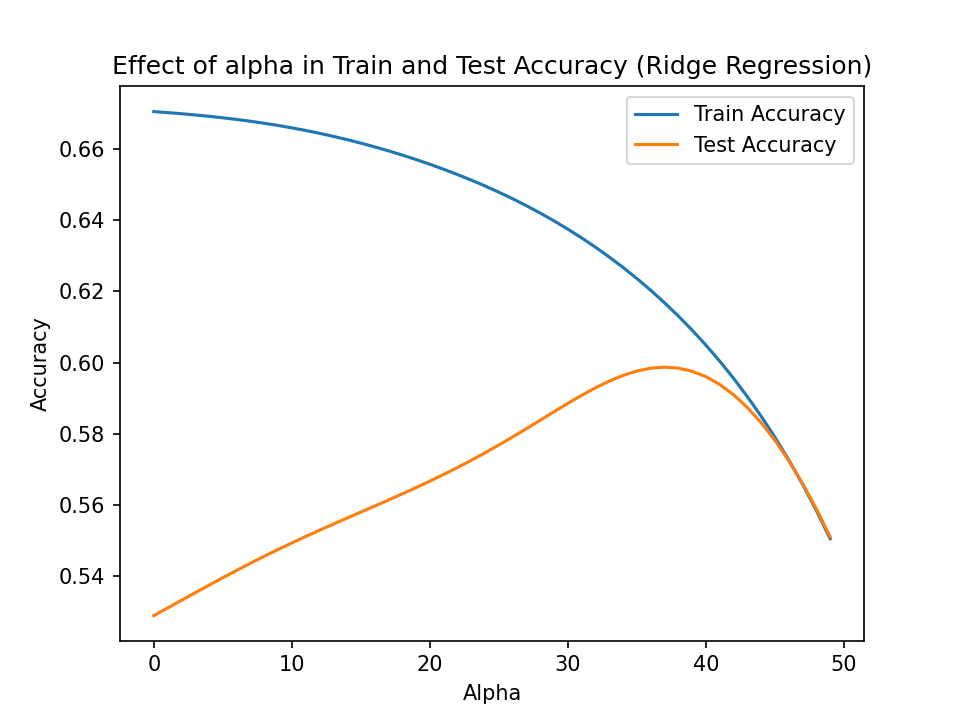

In [11]:
print("Effect of alpha in Train and Test Accuracy.\n")
trainlist_ridge = []
testlist_ridge = []

alpha_val = np.logspace(-1, 2, 50)
for alfa in alpha_val:
    linridge = Ridge(alpha = alfa)
    linridge.fit(X_train_scaled, y_train)
    train_acc_al = linridge.score(X_train_scaled, y_train)
    test_acc_al = linridge.score(X_test_scaled, y_test)
    w_al = linridge.coef_
    b_al = linridge.intercept_
    
    print('For Alpha = {:.3f}:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}\n============================================'
         .format(alfa, train_acc_al, test_acc_al))
    trainlist_ridge.append(train_acc_al)
    testlist_ridge.append(test_acc_al)
    

plt.figure()
ax = plt.subplot(1, 1, 1)    
ax.plot(trainlist_ridge, label = 'Train Accuracy')
ax.plot(testlist_ridge, label = 'Test Accuracy')
#ax.set_xticklabels(alpha_val)
ax.set_title("Effect of alpha in Train and Test Accuracy (Ridge Regression)")
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

## Algorithm 5 : Lasso Regression

In [12]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
X_crime, y_crime = load_crime_dataset()

scale = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)
X_train_scaled = scale.fit_transform(X_train)
X_test_Scaled = scale.transform(X_test)

linlasso = Lasso(alpha = 2, max_iter = 10000)
linlasso.fit(X_train_scaled, y_train)
train_acc_lasso = linlasso.score(X_train_scaled, y_train)
test_acc_lasso = linlasso.score(X_test_scaled, y_test)
w_lasso = linlasso.coef_
b_lasso = linlasso.intercept_
print('Train Accuracy : {:.3f}\nTest Accuracy : {:.3f}'.format(train_acc_lasso, test_acc_lasso))
#print('Linear model coefficient(w) : {}\nLinear model intercept(b) : {:.3f}'
      #.format(w_lasso, b_lasso))

Train Accuracy : 0.631
Test Accuracy : 0.624


**Lasso regression with regularization parameter: alpha**

For Alpha = 0.100:
Train Accuracy : 0.667, Test Accuracy : 0.546
For Alpha = 0.115:
Train Accuracy : 0.667, Test Accuracy : 0.552
For Alpha = 0.133:
Train Accuracy : 0.666, Test Accuracy : 0.558
For Alpha = 0.153:
Train Accuracy : 0.664, Test Accuracy : 0.564
For Alpha = 0.176:
Train Accuracy : 0.663, Test Accuracy : 0.566
For Alpha = 0.202:
Train Accuracy : 0.661, Test Accuracy : 0.568
For Alpha = 0.233:
Train Accuracy : 0.659, Test Accuracy : 0.570
For Alpha = 0.268:
Train Accuracy : 0.658, Test Accuracy : 0.570
For Alpha = 0.309:
Train Accuracy : 0.657, Test Accuracy : 0.571
For Alpha = 0.356:
Train Accuracy : 0.655, Test Accuracy : 0.573
For Alpha = 0.409:
Train Accuracy : 0.653, Test Accuracy : 0.575
For Alpha = 0.471:
Train Accuracy : 0.651, Test Accuracy : 0.579
For Alpha = 0.543:
Train Accuracy : 0.649, Test Accuracy : 0.583
For Alpha = 0.625:
Train Accuracy : 0.647, Test Accuracy : 0.588
For Alpha = 0.720:
Train Accuracy : 0.645, Test Accuracy : 0.594
For Alpha = 0.829:
Train 

<IPython.core.display.Javascript object>


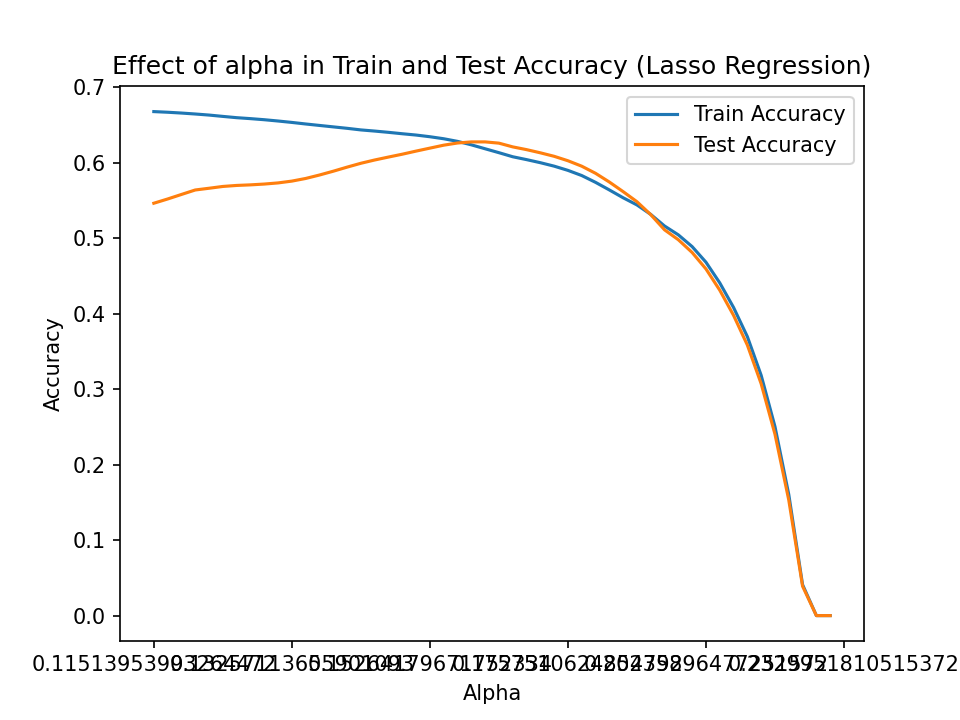

<ipython-input-13-3011c9e91693>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.logspace(-1,2,50))


In [13]:
trainlist_lasso = []
testlist_lasso = []
for alpha in np.logspace(-1,2,50):
    linlasso = Lasso(alpha = alpha , max_iter = 10000)
    linlasso.fit(X_train_scaled, y_train)
    train_acc_lasso = linlasso.score(X_train_scaled, y_train)
    test_acc_lasso = linlasso.score(X_test_scaled, y_test)
    w_lasso = linlasso.coef_
    b_lasso = linlasso.intercept_
    print('For Alpha = {:.3f}:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}\n============================================'
         .format(alpha, train_acc_lasso, test_acc_lasso))
    trainlist_lasso.append(train_acc_lasso)
    testlist_lasso.append(test_acc_lasso)

plt.figure()
ax = plt.subplot(1, 1, 1)
ax.plot(trainlist_lasso, label = 'Train Accuracy')
ax.plot(testlist_lasso, label = 'Test Accuracy')
ax.set_title('Effect of alpha in Train and Test Accuracy (Lasso Regression)')
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(np.logspace(-1,2,50))
ax.legend()
plt.show()

## Algorithm 6 : Polynomial Regression

In [14]:
# Using Friedman dataset.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(Xf, yf, random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Linear Regression:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}\n'
     .format(linreg.score(X_train, y_train), linreg.score(X_test, y_test)))


#Polynomial Regression
poly = PolynomialFeatures(degree = 2)
Xf_poly = poly.fit_transform(Xf)
X_train, X_test, y_train, y_test = train_test_split(Xf_poly, yf, random_state = 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('Polynomial Regression (Degree 2):\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}\n'
     .format(linreg.score(X_train, y_train), linreg.score(X_test, y_test)))

# Polynomial Regression is used in combination of other regression that has regularization penalty, to prevent overfitting.
poly = PolynomialFeatures(degree = 2)
poly.fit_transform(Xf)
X_train, X_test, y_train, y_test = train_test_split(Xf_poly, yf, random_state = 0)
linridge = Ridge()
linridge.fit(X_train, y_train)
print('Polynomial(2 degree) & Ridge regression (Combined):\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}'
     .format(linridge.score(X_train, y_train), linridge.score(X_test, y_test)))

Linear Regression:
Train Accuracy : 0.741, Test Accuracy : 0.702

Polynomial Regression (Degree 2):
Train Accuracy : 0.955, Test Accuracy : 0.875

Polynomial(2 degree) & Ridge regression (Combined):
Train Accuracy : 0.818, Test Accuracy : 0.793


## Algorithm 7 : Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from adspy_shared_utilities import (plot_class_regions_for_classifier_subplot)

X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state = 0)
clf = LogisticRegression()
clf.fit(X_train, y_train)
train_acc_clf = clf.score(X_train, y_train)
test_acc_clf = clf.score(X_test, y_test)

print('Logistic Regression:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}'
     .format(train_acc_clf, test_acc_clf))

Logistic Regression:
Train Accuracy : 0.813, Test Accuracy : 0.840


 **Logistic Regression on Cancer Dataset**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = LogisticRegression(max_iter= 3000)
clf.fit(X_train, y_train)
print('Logistic Regression on Breast Cancer Dataset:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Logistic Regression on Breast Cancer Dataset:
Train Accuracy : 0.960, Test Accuracy : 0.951


**Logistic regression for binary classification on fruits dataset using height, width features (positive class: apple, negative class: others)**

In [17]:
X_fruit, y_fruit, fruit_type = load_fruit_data()
X_fruit = X_fruit[['height', 'width']]

X_train, X_test, y_train, y_test = train_test_split(X_fruit, y_fruit, random_state = 0)
clf = LogisticRegression(max_iter = 5000)
clf.fit(X_train, y_train)
print('Logistic Regression on Breast Cancer Dataset:\nTrain Accuracy : {:.3f}, Test Accuracy : {:.3f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))


Logistic Regression on Breast Cancer Dataset:
Train Accuracy : 0.773, Test Accuracy : 0.733


## Algorithm 8 : Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state = 0)

clf = SVC(kernel = 'linear', C = 1.0) #c is a regularization parameter
clf.fit(X_train, y_train)
print('Support Vector Machine\nTrain accuracy : {:.2f}, Test Accuracy : {:.2f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Support Vector Machine
Train accuracy : 0.80, Test Accuracy : 0.80


**Effect of C parameter in SVM**

<IPython.core.display.Javascript object>


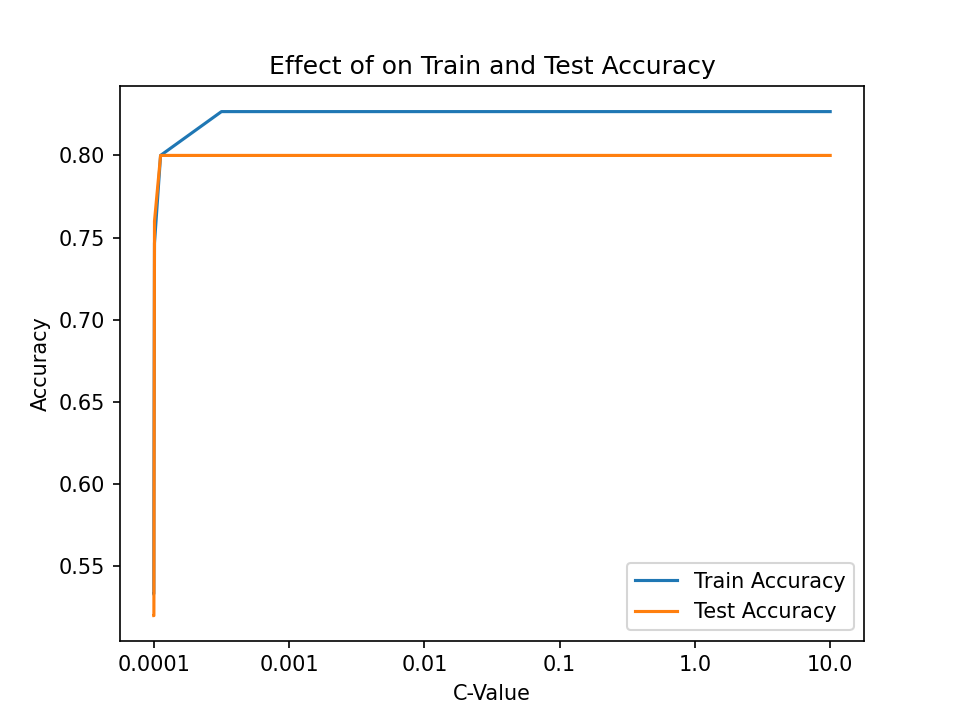

<ipython-input-19-5d8973c9df8e>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(c_param)


In [19]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state = 0)
train_acc_svc = []
test_acc_svc = []

c_param = np.logspace(-5, 2, 8)
for c in c_param:
    clf = SVC(kernel = 'linear', C = c)
    clf.fit(X_train, y_train)
    train_acc_svc.append(clf.score(X_train, y_train))
    test_acc_svc.append(clf.score(X_test, y_test))
    
plt.figure()
plt.plot(c_param, train_acc_svc, label = 'Train Accuracy')
plt.plot(c_param, test_acc_svc, label = 'Test Accuracy')
plt.gca().set_title('Effect of on Train and Test Accuracy')
plt.gca().set_xlabel('C-Value')
plt.gca().set_ylabel('Accuracy')
plt.gca().set_xticklabels(c_param)
plt.legend()
plt.show()

**SVM on Cancer Dataset - Un-Normalized Data**

In [20]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
clf = SVC(C = 10)
clf.fit(X_train, y_train)
print('Breast Cancer Dataset:\nTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}'
     .format(clf.score(X_train, y_train), clf.score(X_test,y_test)))

Breast Cancer Dataset:
Train Accuracy : 0.92, Test Accuracy : 0.94


**SVM on Cancer Dataset - Normalized Data**

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)
clf = SVC(C=10)
clf.fit(X_train_scaled, y_train)
print('Breast Cancer Dataset:\nTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}'
     .format(clf.score(X_train_scaled, y_train), clf.score(X_test_scaled,y_test)))

Breast Cancer Dataset:
Train Accuracy : 0.99, Test Accuracy : 0.97


**SVM on Fruit Dataset**

In [22]:
from sklearn.svm import LinearSVC
X_fruit, y_fruit, fruit_types = load_fruit_data()
X_fruit = X_fruit[['height', 'width']]

X_train, X_test, y_train, y_test = train_test_split(X_fruit, y_fruit, random_state = 0)

clf = LinearSVC(C = 10, random_state = 0)
clf.fit(X_train, y_train)
w_fruit = clf.coef_
b_fruit = clf.intercept_
print('Fruit Types : \n',fruit_types)
print('w:\n',w_fruit)
print('b:\n',b_fruit)
wx = []
for i in range(0,4):
    wx.append(X_fruit['height'].values[i]*w_fruit[i][0] + X_fruit['width'].values[i]*w_fruit[i][1] )
line = wx + b_fruit
print('y = wx + b :\n', line)
print('\nFruit Dataset: ')
print('Train Accuracy : {:.2f}, Test Accuracy : {:.2f}'.format(clf.score(X_train, y_train), clf.score(X_test, y_test)) )

Fruit Types : 
 ['apple', 'mandarin', 'orange', 'lemon']
w:
 [[-2.57248683e-01  7.86828544e-01]
 [-1.77294497e+00  1.25096102e+00]
 [ 4.75257445e-04  3.63760095e-01]
 [ 1.29494695e+00 -1.75689029e+00]]
b:
 [-3.98335332  1.30524064 -3.06270987  1.43090601]
y = wx + b :
 [ 0.74809107 -0.74309698 -0.36746331 -3.37556312]

Fruit Dataset: 
Train Accuracy : 0.75, Test Accuracy : 0.47


C:\Users\dewan\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Algorithm 9 : Kernelized Support Vector Machines (K-SVM)

**Effects of different kernel types on train and test set accuracy on "Make Blobs" Dataset.**

In [23]:
print('Make Blobs Dataset:\n')
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
names = ['linear', 'rbf', 'poly']
from sklearn.svm import SVC
for n in names:
    clf = SVC(kernel = n, C = 10)
    clf.fit(X_train, y_train)
    print('Used Kernel : {}\nTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}\n'
          .format(n, clf.score(X_train, y_train), clf.score(X_test, y_test)) )

Make Blobs Dataset:

Used Kernel : linear
Train Accuracy : 0.93, Test Accuracy : 0.76

Used Kernel : rbf
Train Accuracy : 0.89, Test Accuracy : 0.84

Used Kernel : poly
Train Accuracy : 0.88, Test Accuracy : 0.72



**Support Vector Machine with RBF kernel: gamma parameter**

In [24]:
print('Make Blobs Dataset:\n')
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
from sklearn.svm import SVC
for g in np.logspace(-3,3,7):
    clf = SVC(kernel = 'rbf', gamma = g)
    clf.fit(X_train, y_train)
    print('Used Gamma Value : {}\nTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}\n'
          .format(g, clf.score(X_train, y_train), clf.score(X_test, y_test)) )

Make Blobs Dataset:

Used Gamma Value : 0.001
Train Accuracy : 0.65, Test Accuracy : 0.52

Used Gamma Value : 0.01
Train Accuracy : 0.87, Test Accuracy : 0.76

Used Gamma Value : 0.1
Train Accuracy : 0.89, Test Accuracy : 0.80

Used Gamma Value : 1.0
Train Accuracy : 0.95, Test Accuracy : 0.60

Used Gamma Value : 10.0
Train Accuracy : 0.96, Test Accuracy : 0.24

Used Gamma Value : 100.0
Train Accuracy : 0.99, Test Accuracy : 0.08

Used Gamma Value : 1000.0
Train Accuracy : 1.00, Test Accuracy : 0.08



In [25]:
print('Make Blobs Dataset:\n')
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
from sklearn.svm import SVC
for c in np.logspace(-3,3,7):
    clf = SVC(kernel = 'rbf', C = c)
    clf.fit(X_train, y_train)
    print('Used C Value(Regularization parameter) : {}\nTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}\n'
          .format(c, clf.score(X_train, y_train), clf.score(X_test, y_test)) )

Make Blobs Dataset:

Used C Value(Regularization parameter) : 0.001
Train Accuracy : 0.15, Test Accuracy : 0.08

Used C Value(Regularization parameter) : 0.01
Train Accuracy : 0.15, Test Accuracy : 0.08

Used C Value(Regularization parameter) : 0.1
Train Accuracy : 0.63, Test Accuracy : 0.44

Used C Value(Regularization parameter) : 1.0
Train Accuracy : 0.87, Test Accuracy : 0.76

Used C Value(Regularization parameter) : 10.0
Train Accuracy : 0.89, Test Accuracy : 0.84

Used C Value(Regularization parameter) : 100.0
Train Accuracy : 0.93, Test Accuracy : 0.72

Used C Value(Regularization parameter) : 1000.0
Train Accuracy : 0.93, Test Accuracy : 0.76



**Support Vector Machine with RBF kernel: using both C and gamma parameter.**

In [26]:
print('Make Blobs Dataset:\n')
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
count = 0
from sklearn.svm import SVC
for c in  np.logspace(-2,2,5):
    for g in np.logspace(-2,2,5):
        clf = SVC(kernel = 'rbf', C = c, gamma = g)
        clf.fit(X_train, y_train)
        print('For C Value : {} & Gamma Value : {}....\tTrain Accuracy : {:.2f}, Test Accuracy : {:.2f}\n'
          .format(c,g, clf.score(X_train, y_train), clf.score(X_test, y_test)) )
        count += 1
print("Total Combination : {}".format(count))

Make Blobs Dataset:

For C Value : 0.01 & Gamma Value : 0.01....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.01 & Gamma Value : 0.1....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.01 & Gamma Value : 1.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.01 & Gamma Value : 10.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.01 & Gamma Value : 100.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.1 & Gamma Value : 0.01....	Train Accuracy : 0.63, Test Accuracy : 0.44

For C Value : 0.1 & Gamma Value : 0.1....	Train Accuracy : 0.75, Test Accuracy : 0.52

For C Value : 0.1 & Gamma Value : 1.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.1 & Gamma Value : 10.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 0.1 & Gamma Value : 100.0....	Train Accuracy : 0.15, Test Accuracy : 0.08

For C Value : 1.0 & Gamma Value : 0.01....	Train Accuracy : 0.87, Test Accuracy : 0.76

For C Va

    This shows that, Out of 25 combination, Both (C=10, g=0.1) & (C=100, g=0.01) combination gives the same and best accuracy,
    which is Train Accuracy : 0.93, Test Accuracy : 0.72

**Cross Validation on K-Neighbors Classifier** 

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
X_fruit, y_fruit, fruit_types = load_fruit_data()
X_fruit = X_fruit[['height', 'width']].values
y_fruit = y_fruit.values
cv_score = cross_val_score(clf, X_fruit, y_fruit)

print('Cross Validation Score (3 fold) : ', cv_score)
print('Average CV score = {:.3f}'.format(np.mean(cv_score)))

Cross Validation Score (3 fold) :  [0.75       0.75       0.83333333 0.83333333 0.81818182]
Average CV score = 0.797


### A note on performing cross-validation for more advanced scenarios.

In some cases (e.g. when feature values have very different ranges), we've seen the need to scale or normalize the training and test sets before use with a classifier. The proper way to do cross-validation when you need to scale the data is *not* to scale the entire dataset with a single transform, since this will indirectly leak information into the training data about the whole dataset, including the test data (see the lecture on data leakage later in the course).  Instead, scaling/normalizing must be computed and applied for each cross-validation fold separately.  To do this, the easiest way in scikit-learn is to use *pipelines*.  While these are beyond the scope of this course, further information is available in the scikit-learn documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

or the Pipeline section in the recommended textbook: Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O'Reilly Media)

**Validation curve example**

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
X_fruit, y_fruit, fruit_types = load_fruit_data()
X_fruit = X_fruit[['height', 'width']].values
y_fruit = y_fruit.values
param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X_fruit, y_fruit,
                                            param_name = 'gamma', param_range = param_range, cv = 3)
print('Train Scores : \n{}\n\nTest Scores : \n{}'.format(train_scores, test_scores))

Train Scores : 
[[0.46153846 0.43589744 0.425     ]
 [0.84615385 0.71794872 0.75      ]
 [0.92307692 0.8974359  0.925     ]
 [1.         1.         0.975     ]]

Test Scores : 
[[0.5        0.3        0.31578947]
 [0.85       0.7        0.63157895]
 [0.55       0.85       0.68421053]
 [0.4        0.2        0.36842105]]


<IPython.core.display.Javascript object>


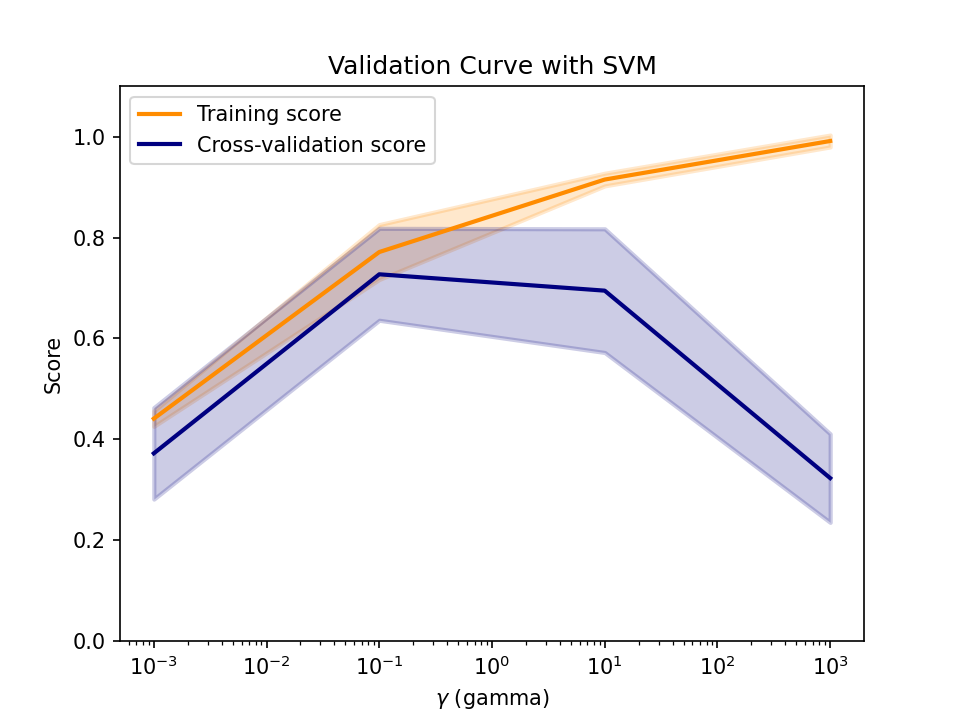

In [29]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

## Algorithm 10 : Decision Trees

**Decision Tree in Iris dataset**

In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Decision Tree on Iris Data')
print('Train Accuracy : {:.2f}, Test Accuracy : {:.2f}'
     .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Decision Tree on Iris Data
Train Accuracy : 1.00, Test Accuracy : 0.97


**This shows overfitting, we can reduce overfitting by adjusting the max_depth parameter.**

In [31]:
train_acc = np.zeros(6)
test_acc = np.zeros(6)
for i in range(6):
    X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
    clf2 = DecisionTreeClassifier(max_depth = i+1)
    clf2.fit(X_train, y_train)
    train_acc[i]= (clf2.score(X_train, y_train))
    test_acc[i] = (clf2.score(X_test, y_test))
    print('Decision Tree(depth = {}) on Iris Data'.format(i+1))
    print('Train Accuracy : {:.2f}, Test Accuracy : {:.2f}'.format(train_acc[i], test_acc[i]))
    
underfit = train_acc.argmin() + 1
goodfit = (train_acc - test_acc).argmin() + 1
overfit = (train_acc - test_acc).argmax() + 1
print('\n\nFor depth={}, model underfits the data'.format(underfit))
print('For depth={}, model goodfits the data'.format(goodfit))
print('For depth={}, model overfits the data'.format(overfit))

Decision Tree(depth = 1) on Iris Data
Train Accuracy : 0.70, Test Accuracy : 0.58
Decision Tree(depth = 2) on Iris Data
Train Accuracy : 0.96, Test Accuracy : 0.89
Decision Tree(depth = 3) on Iris Data
Train Accuracy : 0.98, Test Accuracy : 0.97
Decision Tree(depth = 4) on Iris Data
Train Accuracy : 1.00, Test Accuracy : 0.97
Decision Tree(depth = 5) on Iris Data
Train Accuracy : 1.00, Test Accuracy : 0.97
Decision Tree(depth = 6) on Iris Data
Train Accuracy : 1.00, Test Accuracy : 0.97


For depth=1, model underfits the data
For depth=3, model goodfits the data
For depth=1, model overfits the data


**Visualizing Important Features of the Iris Dataset , using feature_importances_ parameter**

<IPython.core.display.Javascript object>


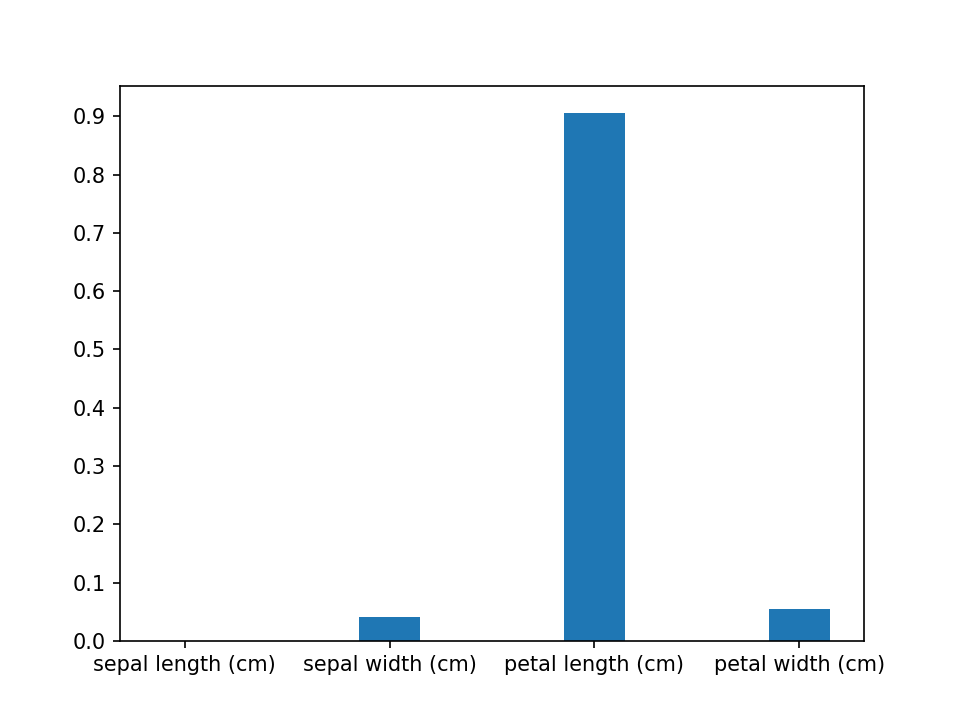

In [32]:
features = iris['feature_names']
importance = clf.feature_importances_
plt.figure()
plt.bar(x = features, height = importance, width = .3)
plt.gca().set_yticks(np.arange(0,1,.1))
plt.show()

**Decision Tree on Cancer Dataset**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer)
clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8, random_state = 0)
clf.fit(X_train, y_train)
print('Decision Tree(depth = 4) on Iris Data')
print('Train Accuracy : {:.2f}, Test Accuracy : {:.2f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Decision Tree(depth = 4) on Iris Data
Train Accuracy : 0.96, Test Accuracy : 0.93


**Important Features Visualization**

<IPython.core.display.Javascript object>


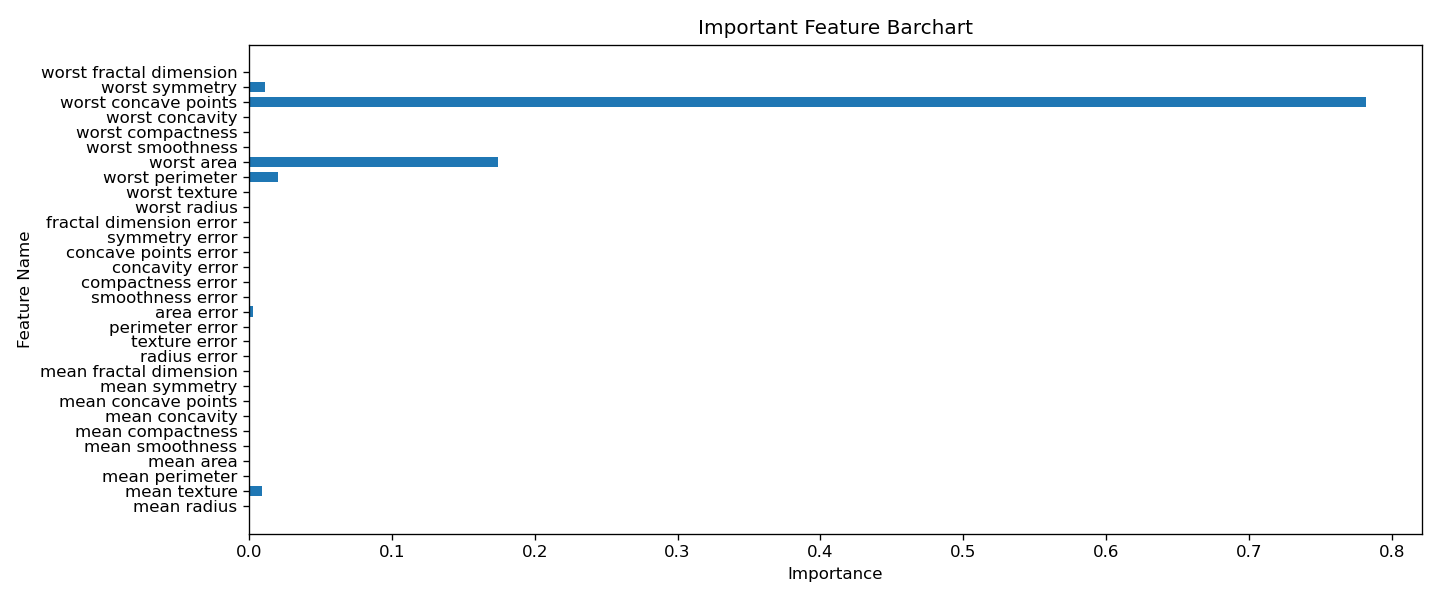

In [34]:
importance = clf.feature_importances_
feature_names = cancer['feature_names']
plt.figure(figsize = (12,5), dpi = 80)
plt.barh(y = range(len(feature_names)), height = 0.7 , width = importance)
plt.title('Important Feature Barchart')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.yticks(ticks = np.arange(len(feature_names)), labels = feature_names)
plt.tight_layout()
plt.show()



## Algorithm 11: Naive Bayes Classifier  (Gaussian)
### Pros:
1. Easy to understand
2. Simple, efficient parameter estimation.
3. Works well with high- dimensional data.
4. Often useful as a baseline comparison against more sophisticated methods.

### Cons:
1. Assumption that features are conditionally independent given the class is not realistic.
2. As a result, other classifier types often have better generalization performance.
3. Their confidence estimates for predictions are not very accurate.

**Example 1 : GaussianNB on Make Classification synthetic data.**

In [35]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Make Classification Synthetic Dataset,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(nbclf.score(X_train, y_train),nbclf.score(X_test, y_test)))

Make Classification Synthetic Dataset,
Train Score = 0.827, Test Score = 0.800


**Example 2 : GaussianNB on Cancer data.**

In [36]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
nbclf = GaussianNB().fit(X_train, y_train)
print('Cancer Dataset,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(nbclf.score(X_train, y_train),nbclf.score(X_test, y_test)))

Cancer Dataset,
Train Score = 0.951, Test Score = 0.937


## Algorithm 12 : Random Forest
    An ensemble of trees, not just one tree. This is Widely used, very good results on many problems.
### Pros:
1. Widely used, excellent prediction performance on many problems.
2. Doesn't require careful normalization of features or extensive parameter tuning.
3. Like decision trees, handles a mixture of feature types.
4. Easily parallelized across multiple CPUs.

### Cons:
1. The resulting models are often difficult for humans to interpret.
2. Like decision trees, random forests may not be a good choice for very high- dimensional tasks (e.g. text classifiers) compared to fast, accurate linear models.

### Key parameters:
1. **n_estimators:** number of trees to use in ensemble (default: 10).
    – Should be larger for larger datasets to reduce overfitting (but uses more computation).
2. **max_features:** has a strong effect on performance. Influences the diversity of trees in the forest.– Default works well in practice, but adjusting may lead to some further gains.
3. **max_depth:** controls the depth of each tree (default: None. Splits until all leaves are pure).
4. **n_jobs:** How many cores to use in parallel during training.

**Example 1: Random Forest on Make blobs Dataset**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xb,yb, random_state = 0)
clf = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
print('Make Blobs DataSet:,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Make Blobs DataSet:,
Train Score = 1.000, Test Score = 0.800


**Example 2: Random Forest on Cancer Dataset**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, random_state = 0)
clf = RandomForestClassifier(max_features = 8, random_state = 0).fit(X_train, y_train)
print('Cancer DataSet:,\nTrain Score = {:.2f}, Test Score = {:.2f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Cancer DataSet:,
Train Score = 1.00, Test Score = 0.97


## Algorithm 13: Gradient-boosted decision trees

Training builds a series of small decision trees.
• Each tree attempts to correct errors from the previous stage. <br>
#### Pros:
• Often best off-the-shelf accuracy on many problems.<br>
• Using model for prediction requires only modest memory and is fast.<br>
• Doesn't require careful normalization of features to perform well.<br>
• Like decision trees, handles a mixture of feature types.<br>

#### Cons:
• Like random forests, the models are often difficult for humans to interpret.<br>
• Requires careful tuning of the learning rate and other parameters.<br>
• Training can require significant computation.<br>
• Like decision trees, not recommended for text classification and other problems with very high dimensional sparse features, for accuracy and computational cost reasons.<br>

#### Key Parameters: 
• n_estimators : Number of small decision trees. <br> 
• learning_rate : Controls emphasis on fixing previous error. <br>
[ The above two are typically tuned together.] <br>
• max_depth : is typically set to a small value (e.g. 3-5).


#### Example 1 : Gradient-boosted decision trees on Make blobs Dataset.

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(Xb,yb, random_state = 0)

clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Make Blobs DataSet:,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Make Blobs DataSet:,
Train Score = 1.000, Test Score = 0.760


#### Example 2: Gradient boosted decision trees on the fruit dataset

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_fruit,y_fruit, random_state = 0)

clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Make Blobs DataSet:,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Make Blobs DataSet:,
Train Score = 1.000, Test Score = 0.667


#### Example 3: Gradient boosted decision trees on the cancer dataset

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, random_state = 0)

clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Make Blobs DataSet:,\nTrain Score = {:.3f}, Test Score = {:.3f}'
      .format(clf.score(X_train, y_train), clf.score(X_test, y_test)))

Make Blobs DataSet:,
Train Score = 1.000, Test Score = 0.965


## Algorithm 14: Neural Network

#### Pros:
• They form the basis of state-of-the-art models and can be formed into advanced architectures that effectively capture complex features given enough data and computation.
#### Cons:
• Larger, more complex models require significant training time, data, and customization.<br>
• Careful preprocessing of the data is needed.<br>
• A good choice when the features are of similar types, but less so when features of very different types.<br>

#### Key parameters:
• **hidden_layer_sizes :**  sets the number of hidden layers (number of elements in list), and number of hidden units per layer (each list element). Default: (100).<br>
• **alpha:** controls weight on the regularization penalty that shrinks weights to zero. Default: alpha = 0.0001.<br>
• **activation:** controls the nonlinear function used for the activation function, including: 'relu' (default), 'logistic', 'tanh'.<br>

**Activation Function**

    three common types of activation functions are being used most frequently, they are the sigmoid, tanh and relu functions

<IPython.core.display.Javascript object>


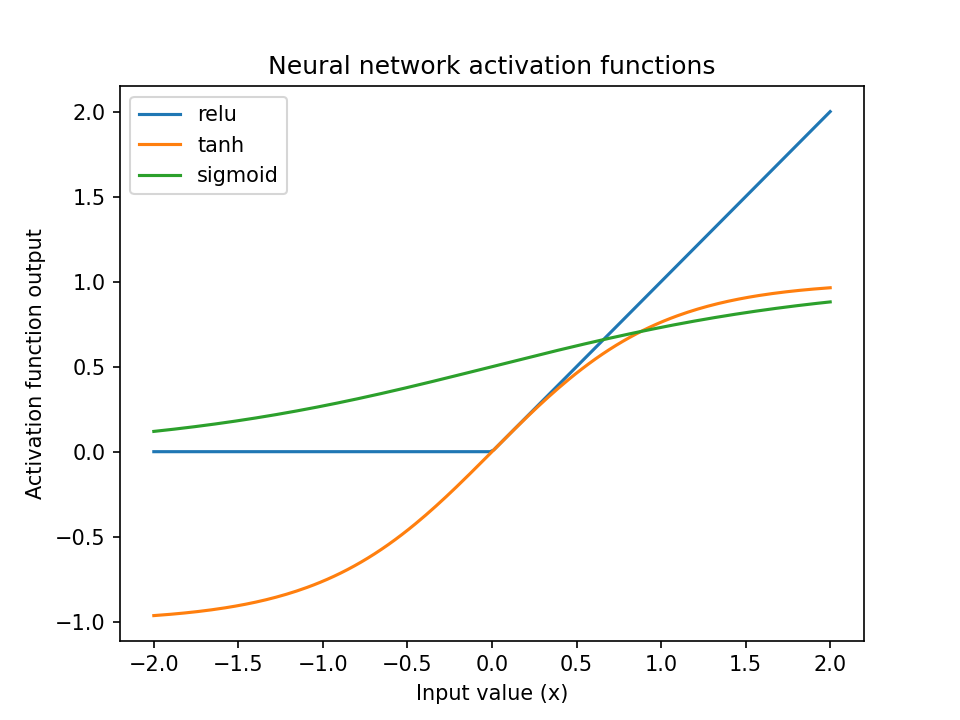

In [93]:
xrange = np.linspace(-2,2, 200)
plt.figure()
plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1/ (1+np.exp(-xrange)), label = 'sigmoid')
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')
plt.legend()
plt.show()

#### Example 1: Neural net on Make Blobs dataset - One Hidden layer

In [102]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
for unit in [1,10,100,1000]:
    nn = MLPClassifier(hidden_layer_sizes = [unit], solver = 'lbfgs', max_iter = 1000,
                      random_state = 0).fit(X_train, y_train)
    print('Make Blobs DataSet (hidden Units = {}):\nTrain Score = {:.3f}, Test Score = {:.3f}\n'
      .format(unit, nn.score(X_train, y_train), nn.score(X_test, y_test)))

Make Blobs DataSet (hidden Units = 1):
Train Score = 0.400, Test Score = 0.320

Make Blobs DataSet (hidden Units = 10):
Train Score = 0.933, Test Score = 0.720

Make Blobs DataSet (hidden Units = 100):
Train Score = 0.960, Test Score = 0.720

Make Blobs DataSet (hidden Units = 1000):
Train Score = 0.960, Test Score = 0.680



#### Example 2 : Neural Net on Make Blob Dataset -Two hidden layers (Using different combinations for hidden layers)

In [87]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
print('NN on Make Blobs Dataset : ')
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
for layer1,layer2 in zip([64, 256, 512, 1000], [64, 256, 512, 1000]):
    nnclf = MLPClassifier(hidden_layer_sizes = [layer1, layer2], solver = 'lbfgs',
                         random_state = 0, max_iter = 1000).fit(X_train, y_train)
    print('Hidden Unit Choice = [{}*{}], Train Accuracy : {:.2f}, Test Accuracy : {:.2f}'
        .format(layer1, layer2, nnclf.score(X_train, y_train), nnclf.score(X_test, y_test)))

NN on Make Blobs Dataset : 
Hidden Unit Choice = [64*64], Train Accuracy : 0.95, Test Accuracy : 0.72
Hidden Unit Choice = [256*256], Train Accuracy : 0.96, Test Accuracy : 0.72
Hidden Unit Choice = [512*512], Train Accuracy : 0.97, Test Accuracy : 0.64
Hidden Unit Choice = [1000*1000], Train Accuracy : 0.99, Test Accuracy : 0.68


#### Example 3 : Neural Net on Make Blob Dataset -Two hidden layers - Using different combinations of alpha - Unscaled Data

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
print('NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):')
for this_alpha in np.logspace(-3, 1, 5):
    nnclf = MLPClassifier(hidden_layer_sizes = [512, 512], random_state = 0, max_iter = 5000,
                         alpha = this_alpha, solver = 'lbfgs').fit(X_train, y_train)
    print('Alpha = {}, Train Accuracy = {:.2f}, Test Accuracy ={:.2f}'.
         format(this_alpha, nnclf.score(X_train, y_train), nnclf.score(X_test, y_test)))

NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):
Alpha = 0.001, Train Accuracy = 0.96, Test Accuracy =0.72
Alpha = 0.01, Train Accuracy = 0.96, Test Accuracy =0.72
Alpha = 0.1, Train Accuracy = 0.99, Test Accuracy =0.68
Alpha = 1.0, Train Accuracy = 0.95, Test Accuracy =0.72
Alpha = 10.0, Train Accuracy = 0.88, Test Accuracy =0.76


#### Example 4 : Neural Net on Make Blob Dataset -Two hidden layers - Using different combinations of alpha- Scaled Data

In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
scale = MinMaxScaler()
print('NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):')
X_train_scaled, X_test_scaled = scale.fit_transform(X_train), scale.transform(X_test)
for this_alpha in np.logspace(-3, 1, 5):
    nnclf = MLPClassifier(hidden_layer_sizes = [512, 512], random_state = 0, max_iter = 2000,
                      solver = 'lbfgs', alpha = this_alpha).fit(X_train_scaled, y_train)
    print('Alpha  = {}, Train Accuracy = {:.2f}, Test Accuracy = {:.2f}'.
          format(this_alpha, nnclf.score(X_train_scaled, y_train), nnclf.score(X_test_scaled, y_test)))
         

NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):
Alpha  = 0.001, Train Accuracy = 0.97, Test Accuracy = 0.76
Alpha  = 0.01, Train Accuracy = 0.97, Test Accuracy = 0.72
Alpha  = 0.1, Train Accuracy = 0.93, Test Accuracy = 0.72
Alpha  = 1.0, Train Accuracy = 0.89, Test Accuracy = 0.76
Alpha  = 10.0, Train Accuracy = 0.15, Test Accuracy = 0.08


#### Example 4 : Neural Net on Make Blob Dataset -Two hidden layers - Using different combinations of activation functions

In [91]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, random_state = 0)
scale = MinMaxScaler()
X_train_scaled, X_test_scaled = scale.fit_transform(X_train), scale.transform(X_test)
print('NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):')
for this_activation in ['identity', 'logistic', 'relu', 'tanh']:
    nnclf = MLPClassifier(hidden_layer_sizes = [512, 512], solver = 'lbfgs', activation = this_activation,
                         max_iter = 2000, alpha = 0.001).fit(X_train_scaled, y_train)
    print('Activation Choice  = {}, Train Accuracy = {:.2f}, Test Accuracy = {:.2f}'.
          format(this_activation, nnclf.score(X_train_scaled, y_train), nnclf.score(X_test_scaled, y_test)))

NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):
Activation Choice  = identity, Train Accuracy = 0.93, Test Accuracy = 0.72
Activation Choice  = logistic, Train Accuracy = 1.00, Test Accuracy = 0.80
Activation Choice  = relu, Train Accuracy = 0.97, Test Accuracy = 0.76
Activation Choice  = tanh, Train Accuracy = 1.00, Test Accuracy = 0.88


#### Example 5 : NN on Cancer Dataset

In [92]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
scale = MinMaxScaler()
X_train_scaled, X_test_scaled = scale.fit_transform(X_train), scale.transform(X_test)
print('NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):')
nnclf = MLPClassifier(hidden_layer_sizes = [512, 512], solver = 'lbfgs', activation = 'relu',
                      max_iter = 2000, alpha = 0.001).fit(X_train_scaled, y_train)
print('Activation Choice  = {}, Train Accuracy = {:.2f}, Test Accuracy = {:.2f}'.
      format(this_activation, nnclf.score(X_train_scaled, y_train), nnclf.score(X_test_scaled, y_test)))

NN on Make Blobs Dataset (Hidden Unit Choice = [512, 512]):
Activation Choice  = tanh, Train Accuracy = 1.00, Test Accuracy = 0.95
